In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=0aa6e42b353257ccf0e2793f1f72e61f2fc9c4cdc5fa74b92518b1bb5e2ab55e
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [4]:
import mglearn

In [9]:
# bincount() : 클래스별 개수를 반환 / 를 써서 7.12일 프로그램을 짜 볼 예정

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print( cancer.keys() )
print( cancer.target_names )
# print( cancer.target[:5])
# print( cancer.data[:5])
print( cancer.data.shape)


#malignant 악성
#benign 양성

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
(569, 30)


In [11]:
import numpy as np

# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
  print({n:v})

{'malignant': 212}
{'benign': 357}


In [12]:
# 특성의 명칭
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [68]:
# 훈련 데이터와 테스트 데이터 분리
# stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 
# 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. 
# (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고
#  classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=0)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [69]:
#np.bincount를 하면 카운트 안에 있는 숫자를 세줌

np.bincount(cancer.target)

#212악성, 357양성

array([212, 357])

In [70]:
#악성과 양성이 있는 값은 Y값임

np.bincount(y_train)

#159악성, 267 양성

array([159, 267])

In [71]:
t1 = np.bincount(y_train)
print(t1[1]/ t1[0])

#1.6정도의 비율 이라는 것

1.679245283018868


In [72]:
t2 = np.bincount(y_test)
print(t2[1]/ t2[0])

1.6981132075471699


In [73]:
t3 = np.bincount(cancer.target)
print(t3[1] / t3[0])

1.6839622641509433


In [74]:
#acc정확도 점수

train_acc = []
test_acc = []
n_neighbors = range(1,11)

for n in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X_train, y_train)
  train_acc.append(model.score(X_train, y_train))
  test_acc.append(model.score(X_test, y_test))
  #score 학습할때 점수를 매겨줌

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_

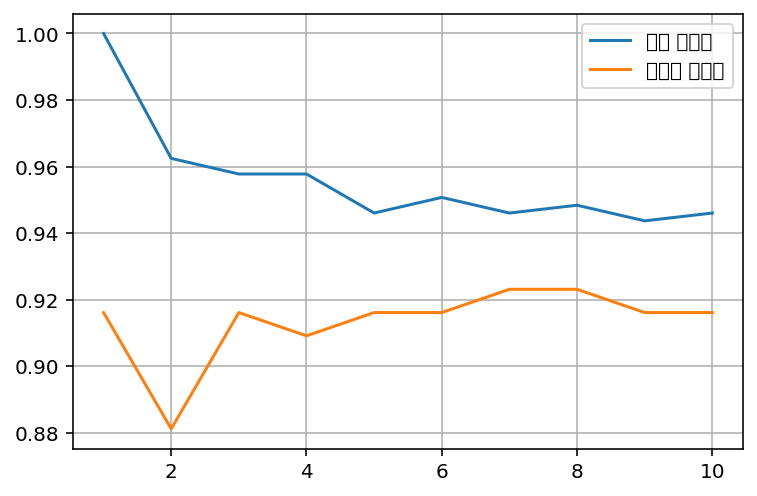

In [75]:
plt.plot(n_neighbors, train_acc, label = '훈련 정확도')
plt.plot(n_neighbors, test_acc, label = '테스트 정확도')
#x축. y축임

plt.grid()
plt.legend()
plt.show()

#상위 코드 중 random state의 영향을 받음

#오늘은 선형회귀 할 예정임

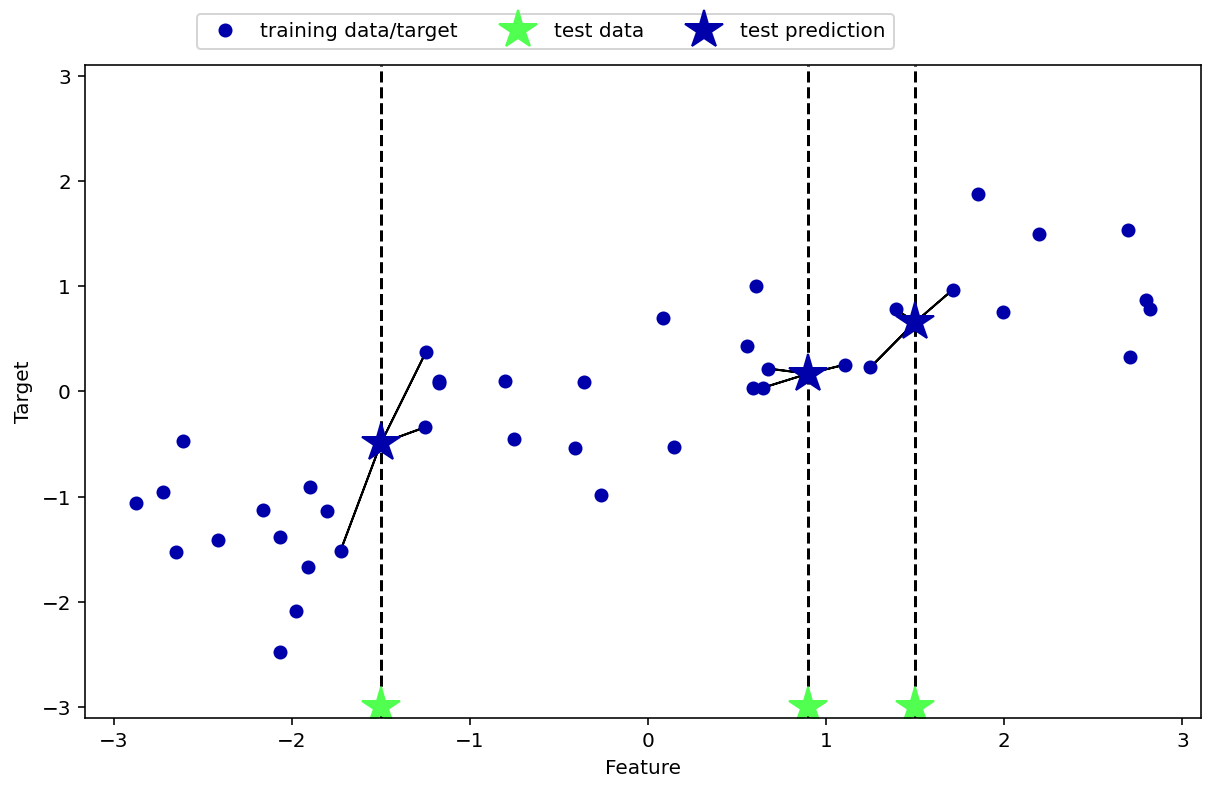

In [76]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_knn_regression(n_neighbors=3)

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

x, y = mglearn.datasets.make_wave(n_samples=9)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)

pre = model.predict(x_test)
pre

array([-0.04382817, -0.04382817, -0.04382817])

In [90]:
from sklearn.neighbors import KNeighborsRegressor

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# 영화에 대한 별점
y_train = [5.0, 6.8, 9.0]

# 코드작성(모델)

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)


# 새로운 영화 3건에 대해 별점을 예측
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

# 코드작성(예측)
pre = model.predict(X_test)
print(np.round(pre, 3))

[6.933 6.933 6.933]



[ ]
!pip install mglearn
# 지도학습 - 선형회귀 (Linear Regression)

회귀 모델이란?

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균 <br>
(어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학 기법)

지도학습 - 선형회귀 (Linear Regression)

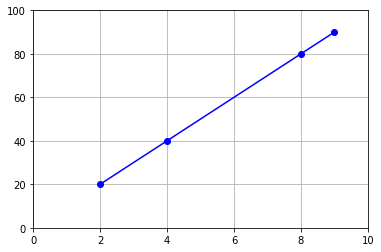

In [1]:
#약간의 수식이 나옴

import matplotlib.pyplot as plt
%matplotlib inline


x = [9, 8, 4, 2]

y = [90, 80, 40, 20]

plt.xlim(0, 10)
plt.ylim(0, 100)
plt.plot(x, y, 'b-o')
plt.grid()

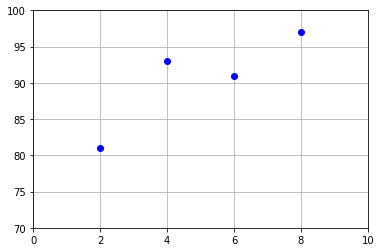

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [8, 6, 4, 2]
y = [97, 91, 93, 81]

plt.xlim(0,10)
plt.ylim(70,100)
plt.plot(x, y, 'bo')
plt.grid()


#7시간을 공부했으면 몇점인지 구해볼까?

#최소한의 선을 한 번 그어보는 거임
#어떤 점은 음수가 어떤 점은 선에 대해 양수가 나올 수 있음
#그럴 때 음수가 나오지 않게 제곱을 해주면 됨.

#오차가 적은 선 = 좋은 선을 구하는 방법, 최소 제곱 법

최소제곱법

> \\( a=\frac { (x-x평균)(y-y평균)의 합 }{ { (x-x평균) }^{ 2 }의 합 }  \\)

- 공부한 시간(x)의 평균: (2+4+6+8) / 4 = 5
- 성적(y)의 평균: (81+93+91+97) / 4 = 90.5

> \\( b=y의 평균- (x의 평균 \times 기울기 a) \\)

- b = 90.5 - (2.3 x 5) = 79


In [3]:
x_mean = np.mean(list(x))
print(x_mean)

y_mean = np.mean(y)
print(y_mean)

NameError: ignored

In [9]:
#내가 한 것

#강사님과 다름 ㅠㅜ


# 오차가 최저가 되는 직선

import numpy as np
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
  # 분자 부분
  dc = 0
  for i in range(len(x)):
    dc += (x[i] - mean_x) * (y[i] - mean_y)
  
  # 분모 부분
  divisor = 0
  for i in x:
    divisor += (i - mean_x)**2
  
  a = dc / divisor
  return a

x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
mx = np.mean(x)
my = np.mean(y)


In [10]:
a = compute_a(x, y, mx, my) # 기울기
b = my - (mx * a)           # 절편

y_pred = [a * x1 + b for x1 in x]

y_pred

[97.4, 92.8, 88.2, 83.6]

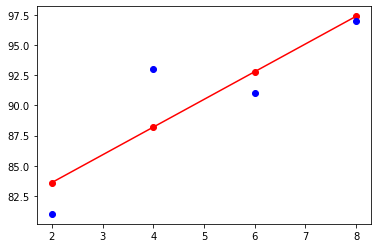

In [11]:
plt.plot(x, y_pred, 'r-o')
plt.plot(x, y, 'bo')
plt.show()

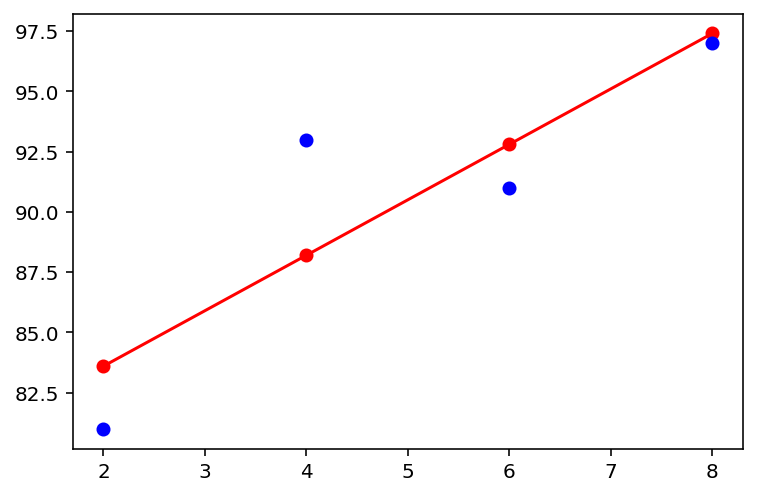

In [109]:
#강사님이 하신 것 정확함



# 오차가 최저가 되는 직선
import numpy as np
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
  # 분자 부분
  dc = 0
  for i in range(len(x)):
    dc += (x[i] - mean_x) * (y[i] - mean_y)
  
  # 분모 부분
  divisor = 0
  for i in x:
    divisor += (i - mean_x)**2
  
  a = dc / divisor
  return a

x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
mx = np.mean(x)
my = np.mean(y)
a = compute_a(x, y, mx, my) # 기울기
b = my - (mx * a)           # 절편

y_pred = [a * x1 + b for x1 in x]

plt.plot(x, y_pred, 'r-o')
plt.plot(x, y, 'bo')
plt.show()

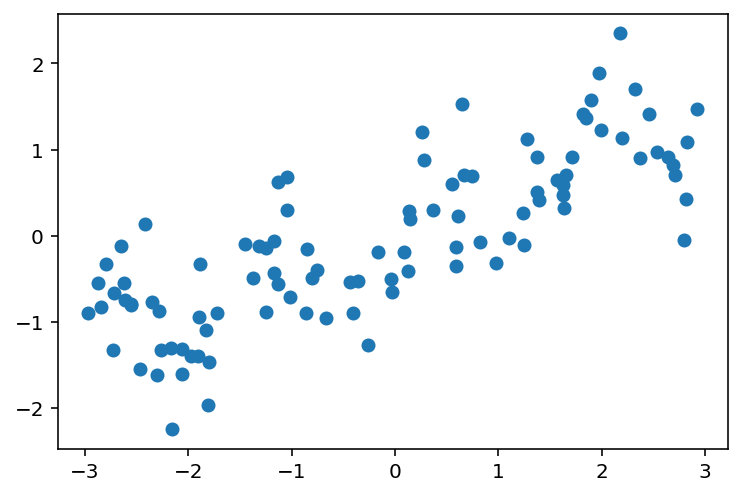

In [119]:
import numpy as np
import mglearn

X, y = mglearn.datasets.make_wave(100)
plt.scatter(X,y)
plt.show()

w[0]: 0.393906  b: -0.031804


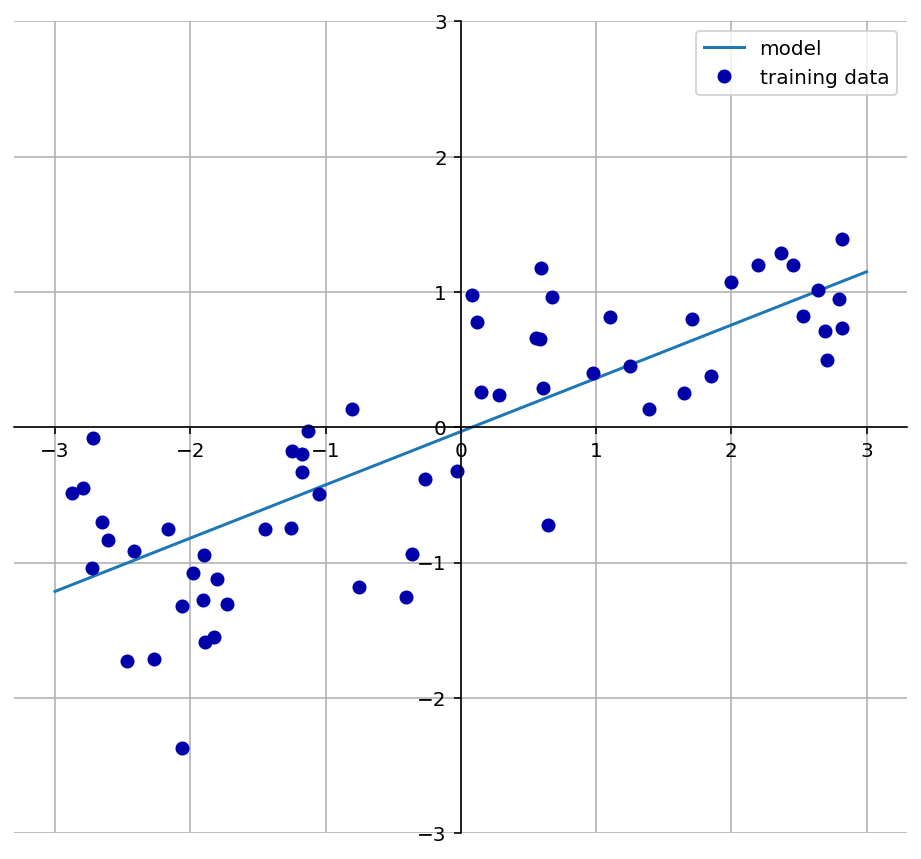

In [120]:
import mglearn
mglearn.plots.plot_linear_regression_wave()


#선형회귀로 알아서 선을 그은 것

- 비용함수 (Cost / Cost function) : 그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이

  - Cost = H(x) - y에 데이터를 대입하여 Cost의 총합을 구하는 것이 가능
  - Cost의 총합이 작은 Hypothesis일수록 데이터를 잘 대변하는 훌륭한 Linear Regression
  - Cost는 양수일 수도, 음수일 수도 있기에 이러한 문제를 방지하고자 총합을 구할 때 Cost값을 제곱하여 평균을 내는 방식(평균제곱오차, MSE, Mean Squared Error)을 사용
  >  \\( cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  \\)

   > \\( H(x)=Wx+b \\)  

 - 머신러닝(or 딥러닝)에서 learning의 목적은 Cost를 정의하고 이를 최소화하는 것

#### 평균제곱오차 (MSE, Mean Squared Error) - 잘못그은 선 바로잡기

- 실제값과 예측값의 차이를 분석하기 위한 것
- 음수가 존재하는 경우 오차가 줄어드는 문제 -> 자승을 취함
- 평균오차가 자승으로 인해 커지는 문제 -> 제곱근을 취함

|x(hour) | y(score)|
|---|---|
|0|0|
|1|1|
|2|2|
|3|3|

\\( H(x)=1 \times  x+0 \\)  

\\( H(x)=0.5 \times x+0 \\)  

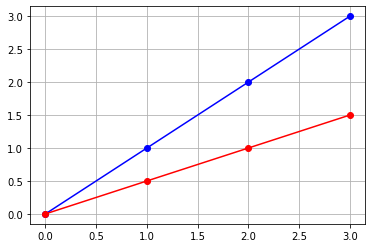

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)


w = 1
b = 0
y_pred1 = w * x + b
plt.plot(x, y_pred1, 'b-o')


w = 0.5
b = 0
y_pred2 = w * x + b
plt.plot(x, y_pred2, 'r-o')

plt.grid()
plt.show()

#선이 2개 나와야함

In [134]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y):
  cost = np.sum((y_pred - y)**2) / len(y)
  return cost


print(MSE(y_pred1, y))

#오차값이 0이 나옴

print(MSE(y_pred2, y))

#오차값이 0.875

#오차값이 0이면 좋은 선임

0.0
0.875


In [139]:
import numpy as np
import matplotlib.pyplot as plt
w_val = []
cost_val = []

n_sample = 200
x1 = np.random.randn(n_sample)

y = 2 * x1 + 4 + np.random.randn(n_sample)
#x와 y에 가상데이터를 주는 거다~

num_epoch = 10
lr = 0.7

w1 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
  y_pred = w1 * x1 + b
  cost = np.abs(y_pred - y).mean()
  xx = lr * ((y_pred - y)* x1).mean()
  print(f'{epoch:2} w1 = {w1:.6f}, b={b:6f}, cost={cost:6f}, (y_pred-y).mean()={xx:6f}')

  w1 = w1 - xx
  b = b-lr * (y_pred -y).mean() 

  #오차의 평균값이 점점 줄어드는 것을 볼 수 있음.

 0 w1 = 0.168489, b=0.871650, cost=3.234871, (y_pred-y).mean()=-1.242319
 1 w1 = 1.410807, b=3.041842, cost=1.237729, (y_pred-y).mean()=-0.443218
 2 w1 = 1.854025, b=3.714387, cost=0.844756, (y_pred-y).mean()=-0.156366
 3 w1 = 2.010392, b=3.923816, cost=0.798186, (y_pred-y).mean()=-0.054684
 4 w1 = 2.065076, b=3.989349, cost=0.791923, (y_pred-y).mean()=-0.018991
 5 w1 = 2.084067, b=4.009955, cost=0.790619, (y_pred-y).mean()=-0.006558
 6 w1 = 2.090625, b=4.016465, cost=0.790253, (y_pred-y).mean()=-0.002254
 7 w1 = 2.092879, b=4.018531, cost=0.790171, (y_pred-y).mean()=-0.000772
 8 w1 = 2.093651, b=4.019190, cost=0.790148, (y_pred-y).mean()=-0.000263
 9 w1 = 2.093914, b=4.019401, cost=0.790140, (y_pred-y).mean()=-0.000090
